<a href="https://colab.research.google.com/github/RohithParahmesh/EDA/blob/main/21BCE0525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Crime.csv")

In [58]:
df.head()

,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
0,1,1,81,0.039885,0.289696,0.402062,0.472222,5.61,0.001787,2.307159,...,5.607452,5.374044,5.434246,6.014619,5.464848,5.444450,-2.433870,3.006608,3.246399,-2.303407
1,2,1,82,0.038345,0.338111,0.433005,0.506993,5.59,0.001767,2.330254,...,5.706707,5.444911,5.482013,6.039540,5.536862,5.467174,-2.449038,3.006608,3.213833,-2.272549
2,3,1,83,0.030305,0.330449,0.525703,0.479705,5.80,0.001836,2.341801,...,5.736475,5.481292,5.597310,6.084157,5.522900,5.515765,-2.464036,3.006608,3.275311,-2.517281
3,4,1,84,0.034726,0.362525,0.604706,0.520104,6.89,0.001886,2.346420,...,5.858180,5.531204,5.640985,6.129421,5.568077,5.577387,-2.478925,3.006608,3.289981,-2.544612
4,5,1,85,0.036573,0.325395,0.578723,0.497059,6.55,0.001924,2.364896,...,5.948220,5.564850,5.700042,6.195282,5.639919,5.664972,-2.497306,3.006608,3.337204,-2.372487


In [59]:
df.shape

(630, 45)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  630 non-null    int64  
 1   county    630 non-null    int64  
 2   year      630 non-null    int64  
 3   crmrte    630 non-null    float64
 4   prbarr    630 non-null    float64
 5   prbconv   630 non-null    float64
 6   prbpris   630 non-null    float64
 7   avgsen    630 non-null    float64
 8   polpc     630 non-null    float64
 9   density   630 non-null    float64
 10  taxpc     630 non-null    float64
 11  region    630 non-null    object 
 12  smsa      630 non-null    object 
 13  pctmin    630 non-null    float64
 14  wcon      630 non-null    float64
 15  wtuc      630 non-null    float64
 16  wtrd      630 non-null    float64
 17  wfir      630 non-null    float64
 18  wser      630 non-null    float64
 19  wmfg      630 non-null    float64
 20  wfed      630 non-null    float6

In [61]:
df.isnull().sum()

,0
rownames,0
county,0
year,0
crmrte,0
prbarr,0
prbconv,0
prbpris,0
avgsen,0
polpc,0
density,0


NO Null values so no requirement for imputing or anything

In [62]:
df.duplicated().sum()

0

NO Duplicated values so no need to work on removal of duplicates

Analysing categorical variables

In [63]:
df['region'].unique()

array(['central', 'west', 'other'], dtype=object)

In [64]:
df['smsa'].unique()

array(['no', 'yes'], dtype=object)

# Univariate Analysis

In [65]:
Average_crime_rate = df['crmrte'].mean()
Average_crime_rate

0.0315875926984127

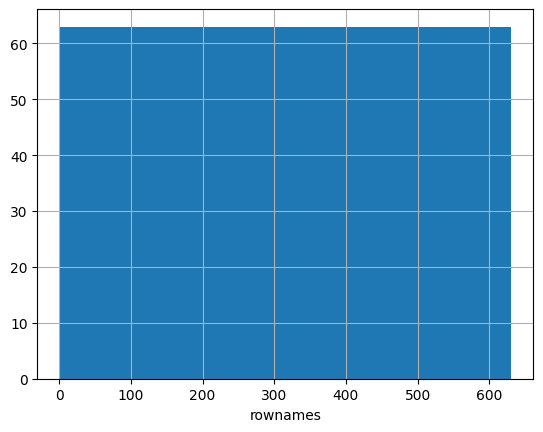

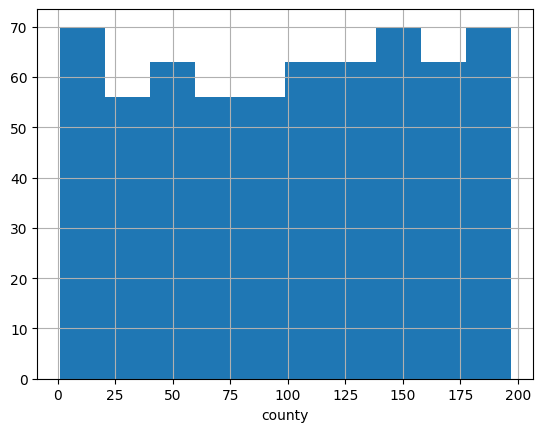

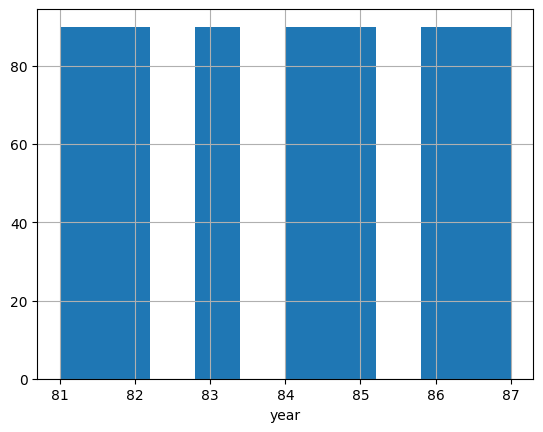

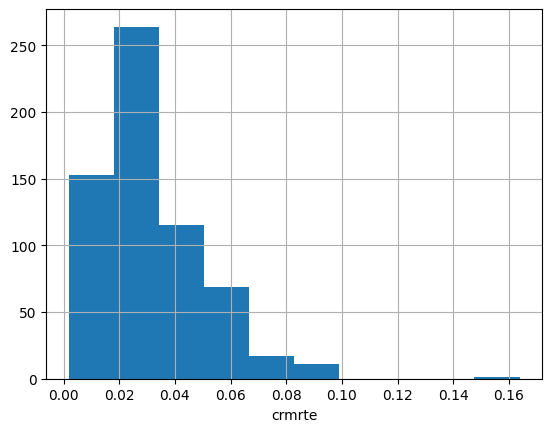

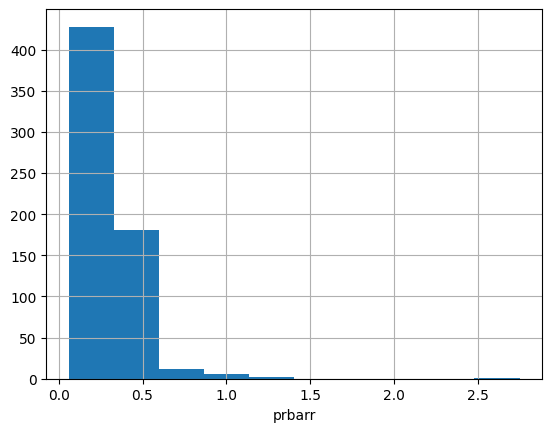

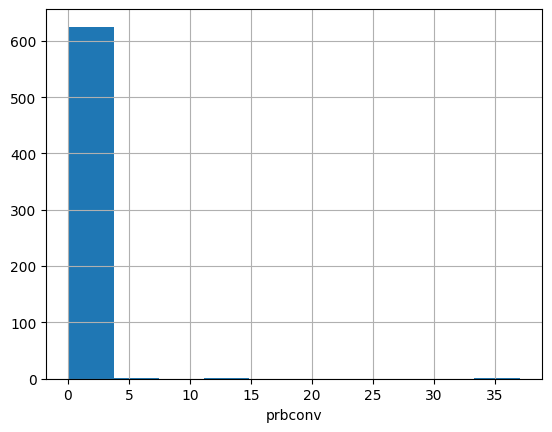

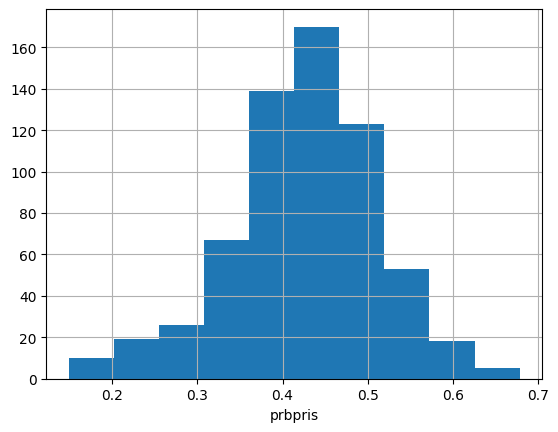

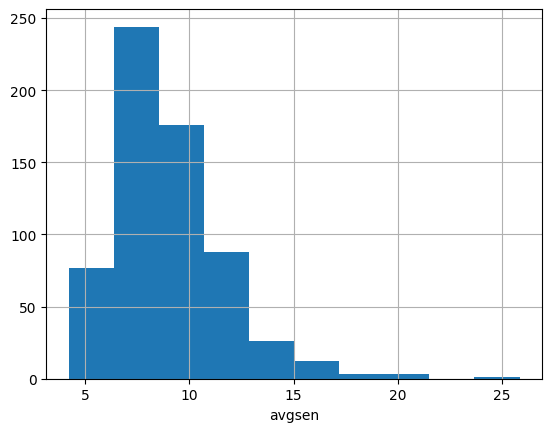

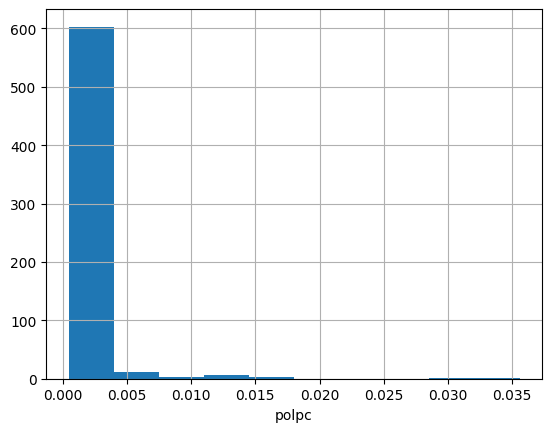

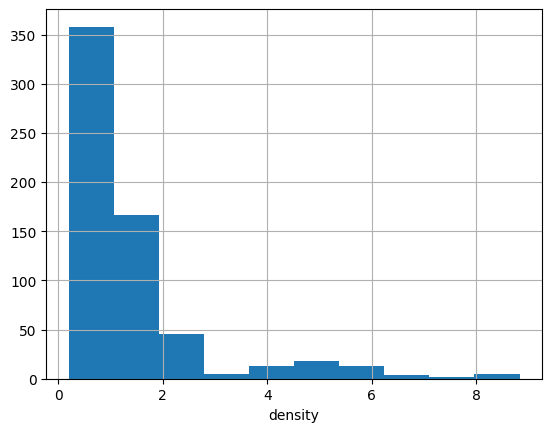

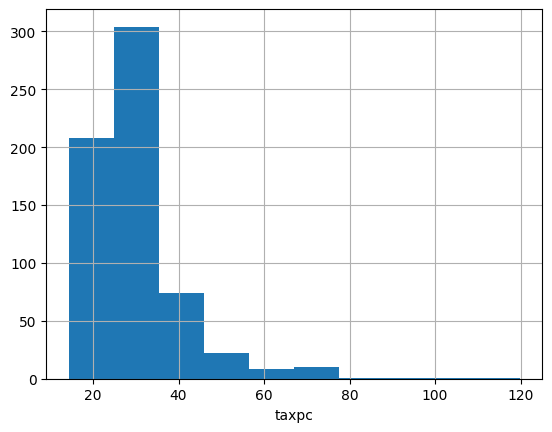

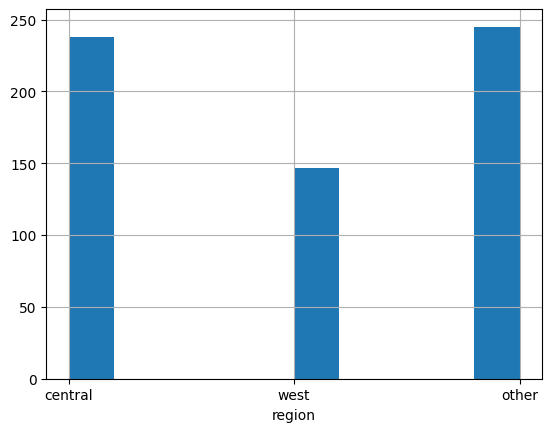

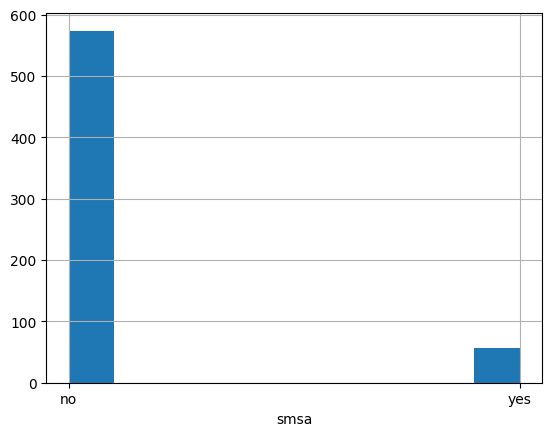

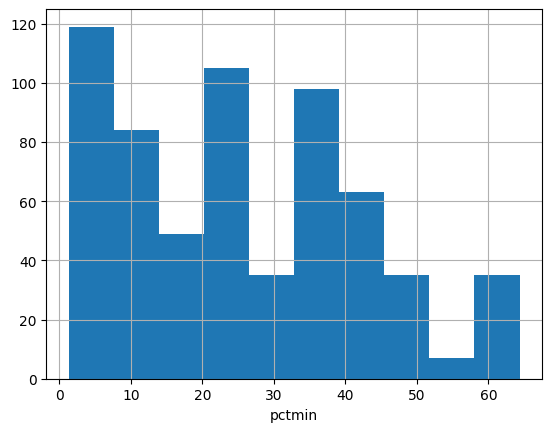

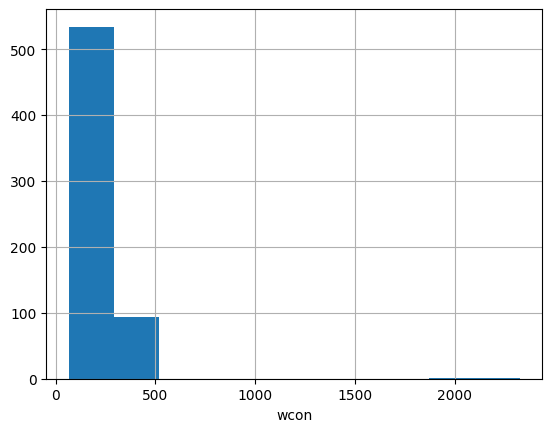

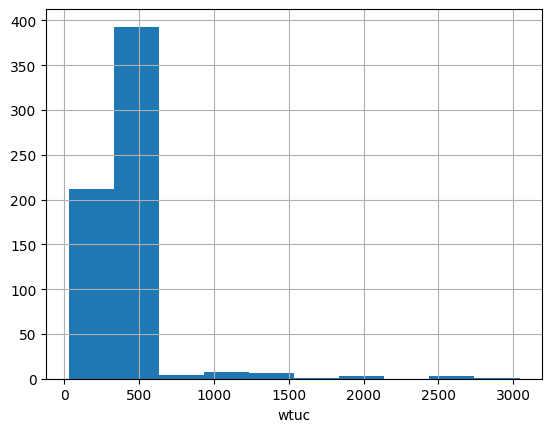

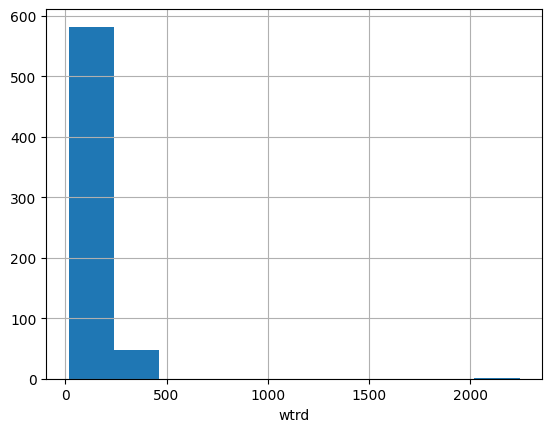

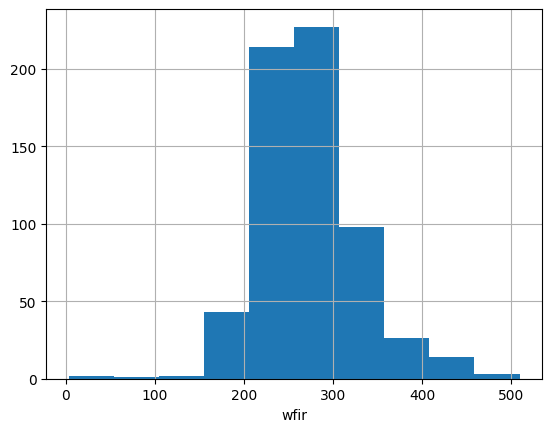

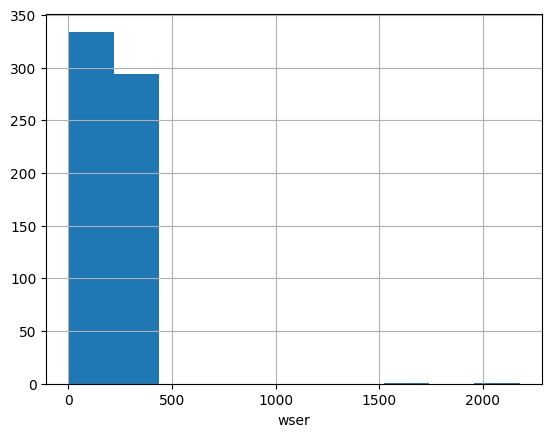

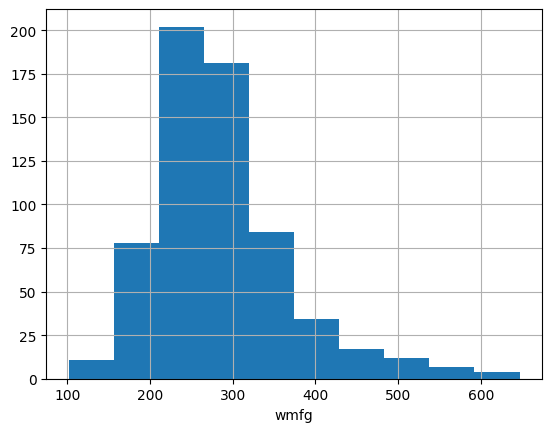

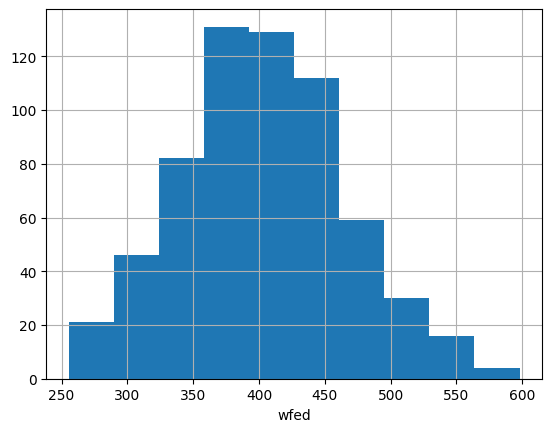

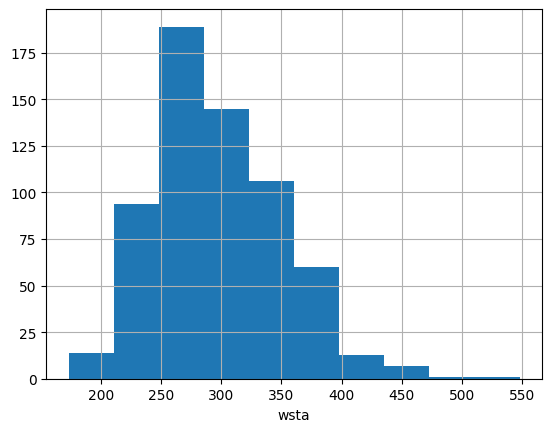

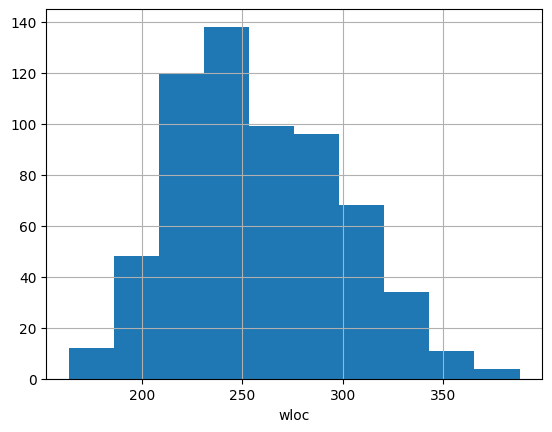

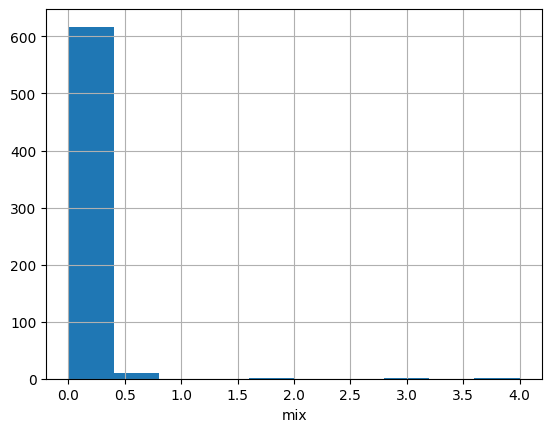

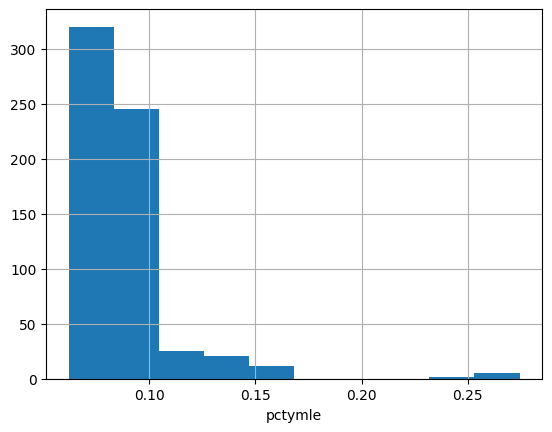

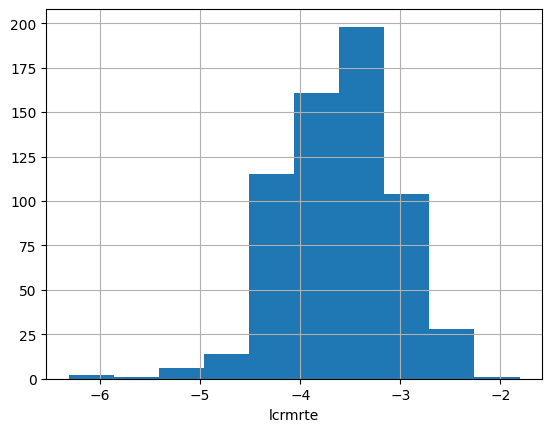

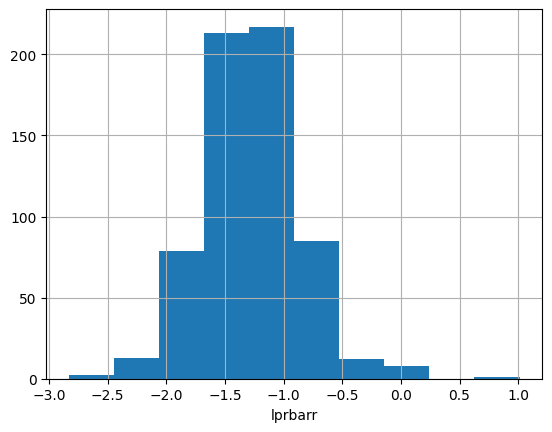

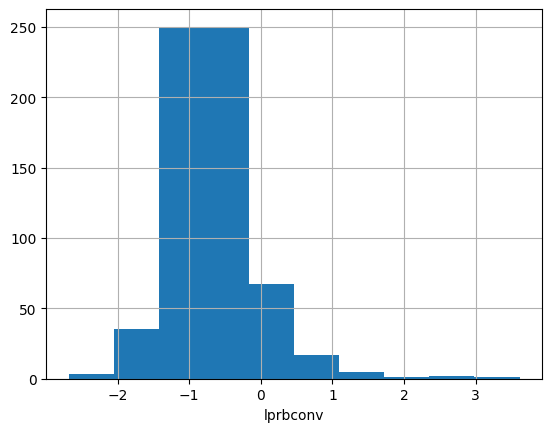

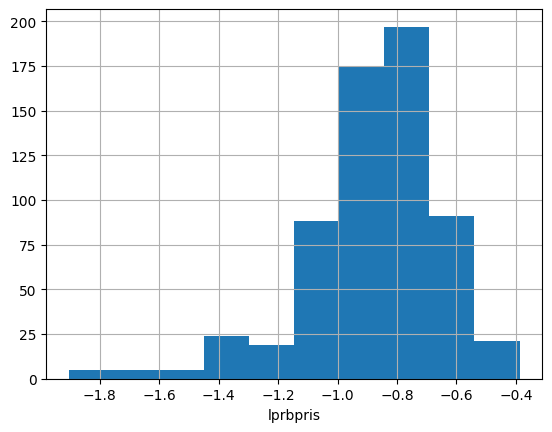

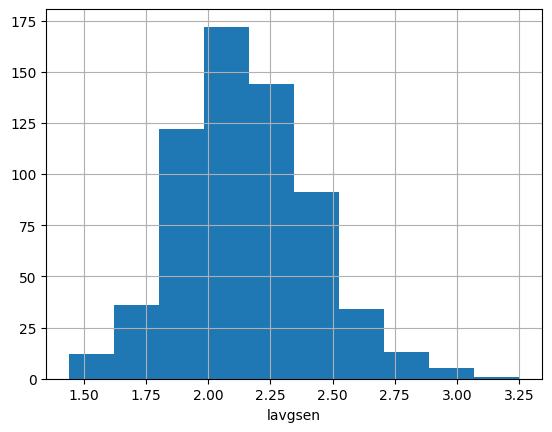

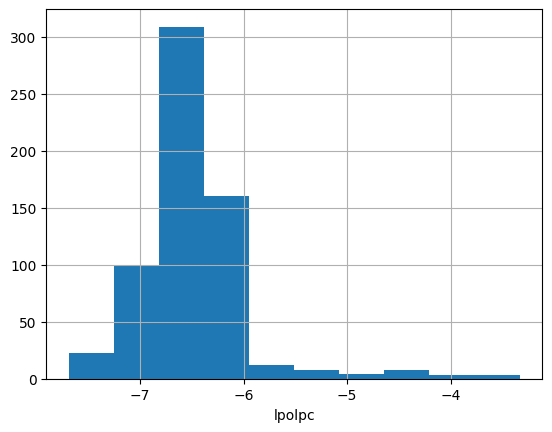

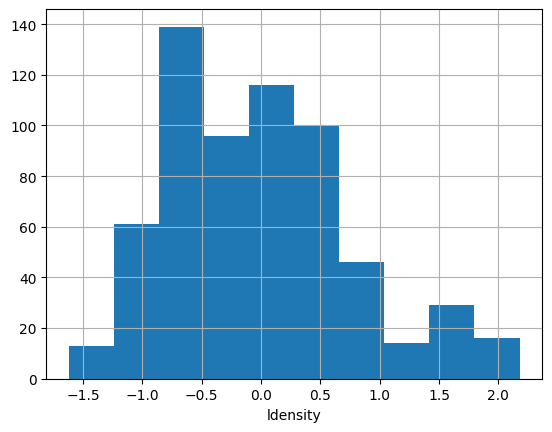

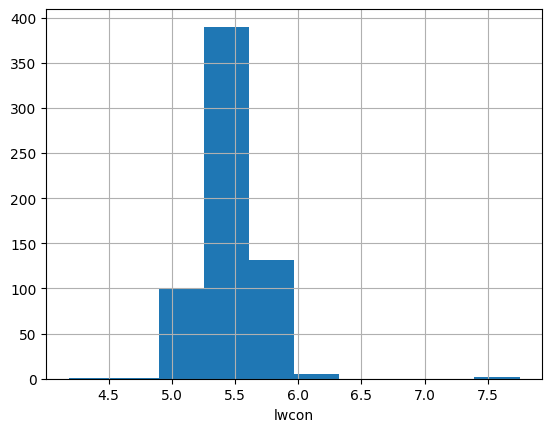

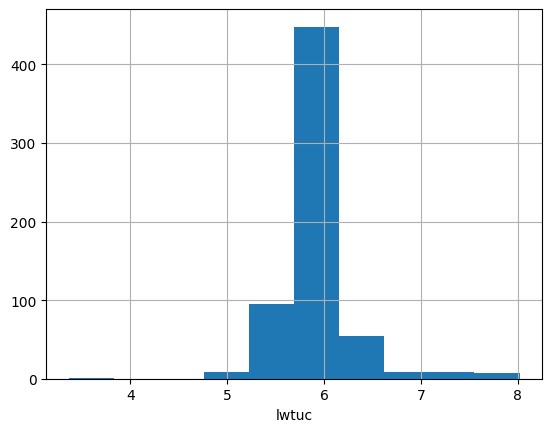

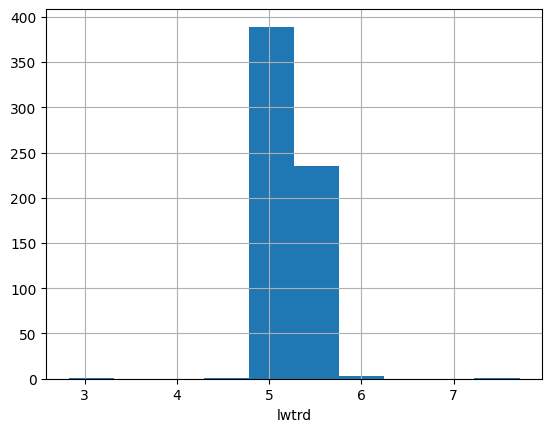

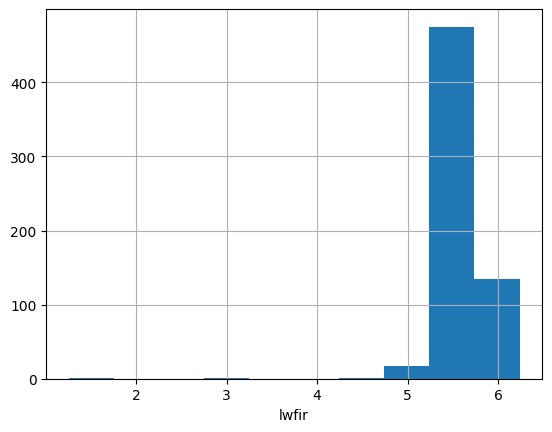

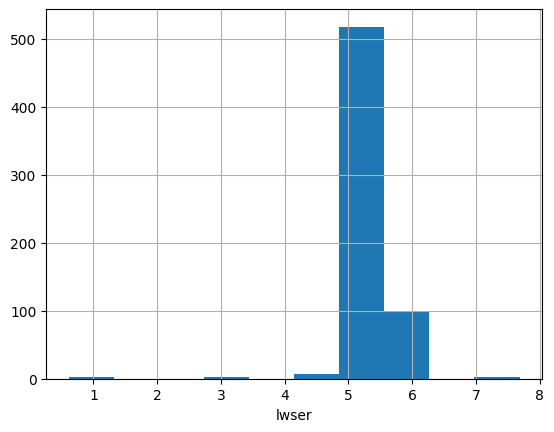

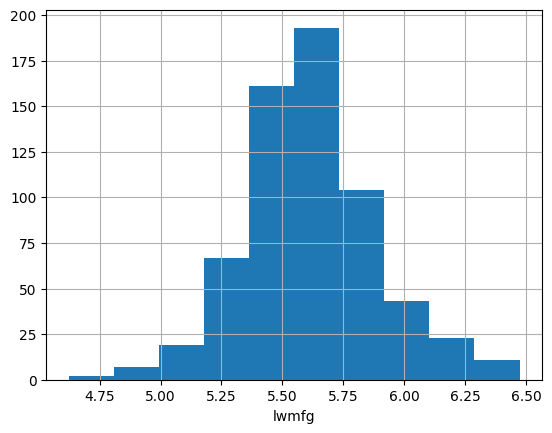

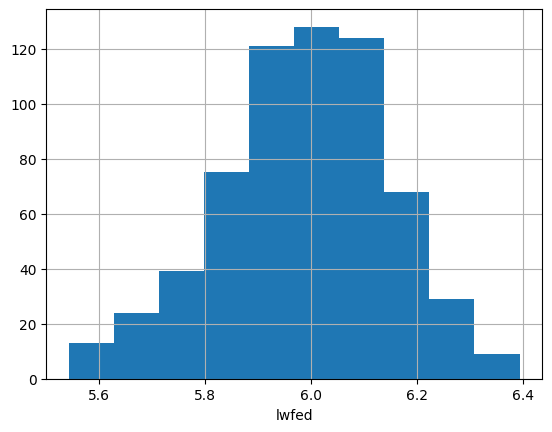

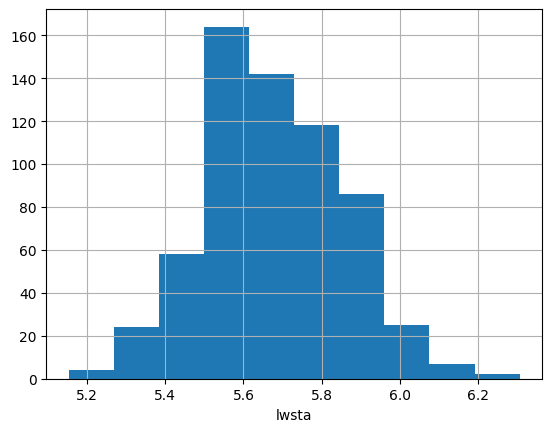

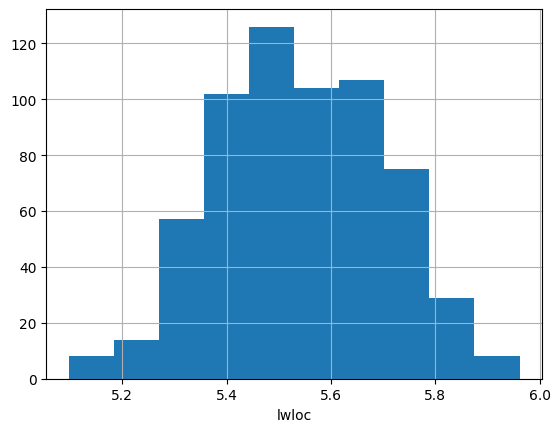

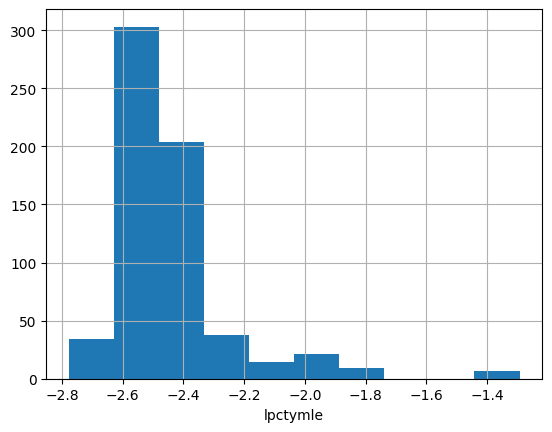

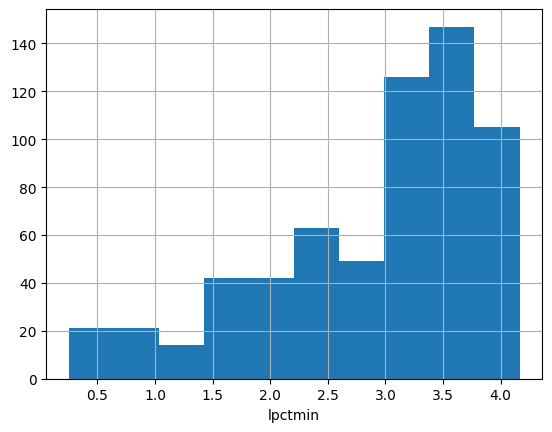

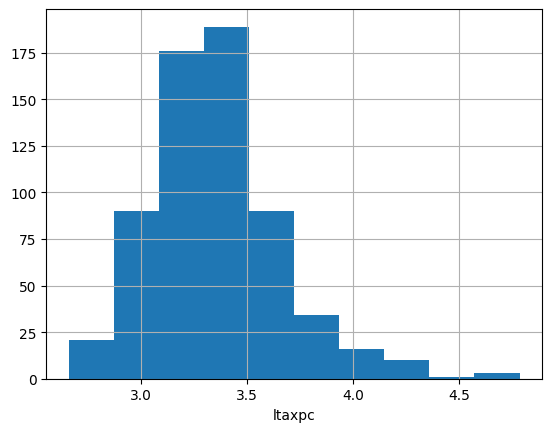

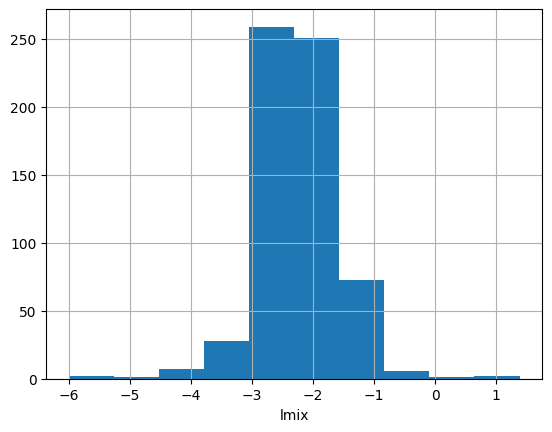

In [66]:
for col in df.columns:
    df[col].hist()
    plt.xlabel(col)
    plt.show()

# BIVARIATE ANALYSIS

Text(0, 0.5, 'taxpc')

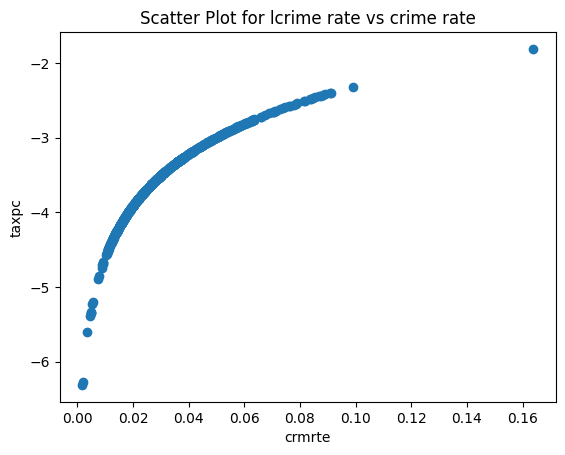

In [67]:
plt.scatter(df["crmrte"], df["lcrmrte"])
plt.title("Scatter Plot for lcrime rate vs crime rate")
plt.xlabel("crmrte")
plt.ylabel("taxpc")



In [68]:
np.corrcoef(df["density"], df["crmrte"])

array([[1.        , 0.69407192],
       [0.69407192, 1.        ]])

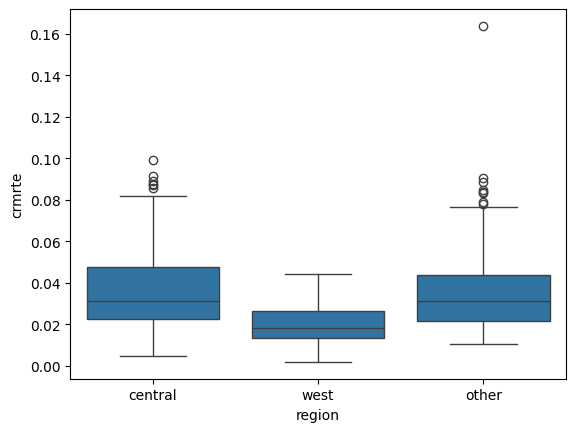

In [69]:
sns.boxplot(x="region",y="crmrte",data=df)
plt.show()

# Multivariate Analysis

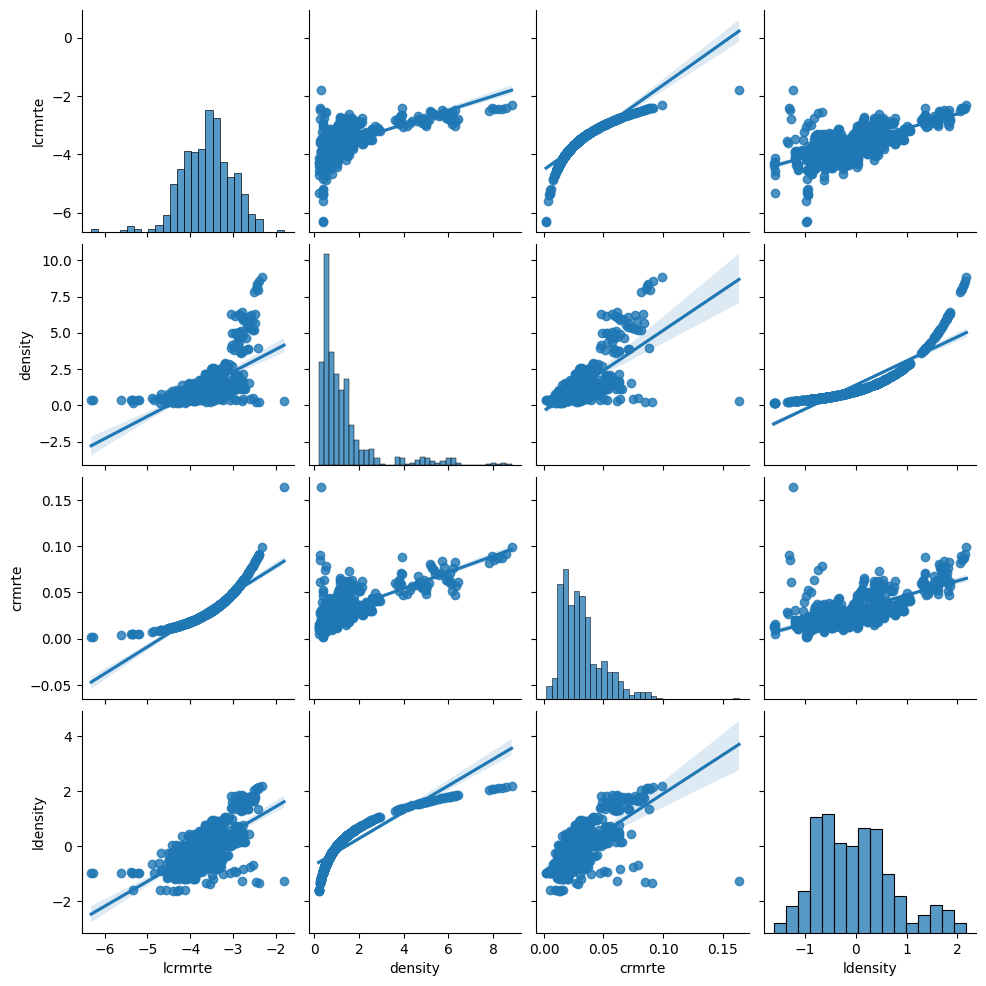

In [70]:
sns.pairplot(df,vars = ['lcrmrte', 'density','crmrte','ldensity'], kind="reg")
plt.show()

In [71]:
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
rownames,1.000000,9.994803e-01,1.099716e-02,0.037209,-0.020628,0.119920,-0.024187,0.049026,0.122540,-0.026558,...,-0.026191,-0.031544,-0.009238,-0.021410,0.087190,0.023774,0.096708,7.992543e-02,-0.041196,-0.060461
county,0.999480,1.000000e+00,2.479813e-14,0.041679,-0.018569,0.118875,-0.024861,0.050534,0.123775,-0.025806,...,-0.030773,-0.035115,-0.015714,-0.025412,0.079339,0.015737,0.102624,8.453915e-02,-0.045382,-0.058806
year,0.010997,2.479813e-14,1.000000e+00,0.002392,-0.028067,0.006527,-0.096085,-0.075257,0.025365,0.023471,...,0.400459,0.298054,0.421389,0.442613,0.700324,0.793363,-0.178572,4.838256e-15,0.520126,0.010131
crmrte,0.037209,4.167863e-02,2.392457e-03,1.000000,-0.358553,-0.113033,0.135537,0.032416,0.184826,0.694072,...,0.175438,0.156418,0.298015,0.414733,0.153715,0.234105,0.259973,2.942103e-01,0.218594,-0.050270
prbarr,-0.020628,-1.856917e-02,-2.806708e-02,-0.358553,1.000000,0.035569,-0.074893,0.034031,0.290581,-0.271228,...,-0.045783,-0.108968,-0.082256,-0.176566,-0.103448,-0.138880,-0.170675,-9.128867e-02,-0.023602,0.423923
prbconv,0.119920,1.188753e-01,6.527245e-03,-0.113033,0.035569,1.000000,-0.037340,0.015305,0.449635,-0.115555,...,-0.051362,-0.041474,-0.083755,-0.066186,-0.001660,-0.027186,-0.083677,4.529440e-02,0.014066,0.154635
prbpris,-0.024187,-2.486140e-02,-9.608535e-02,0.135537,-0.074893,-0.037340,1.000000,-0.004299,-0.057452,0.164663,...,-0.038747,-0.024746,0.039186,0.145964,-0.072285,0.007061,-0.126418,1.642589e-01,-0.109403,0.076147
avgsen,0.049026,5.053367e-02,-7.525718e-02,0.032416,0.034031,0.015305,-0.004299,1.000000,0.017130,0.078075,...,0.039898,-0.083133,0.071619,-0.002974,-0.003438,-0.015778,0.055680,-6.300521e-02,0.008684,-0.004147
polpc,0.122540,1.237755e-01,2.536452e-02,0.184826,0.290581,0.449635,-0.057452,0.017130,1.000000,-0.039696,...,-0.023720,-0.034349,-0.004673,-0.029769,0.049200,-0.017209,-0.036797,-4.931032e-02,0.121639,0.136764
density,-0.026558,-2.580562e-02,2.347055e-02,0.694072,-0.271228,-0.115555,0.164663,0.078075,-0.039696,1.000000,...,0.238334,0.217266,0.392366,0.496390,0.191367,0.296584,0.142714,6.963854e-02,0.214573,-0.063125


<Axes: >

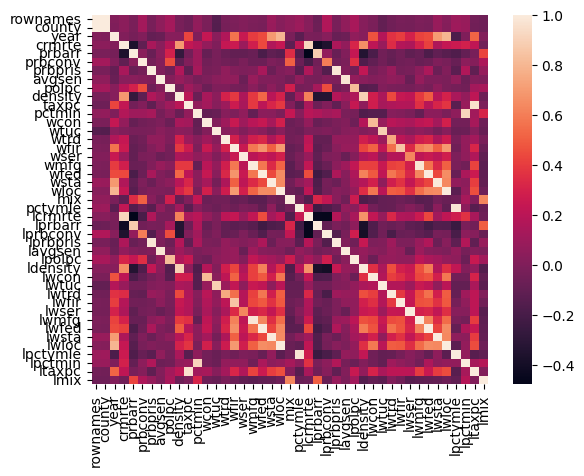

In [72]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

# Time Series Analysis

convert year field to date type

In [73]:
df['year'] = 1900+df['year']
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.head()

,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
0,1,1,1981-01-01,0.039885,0.289696,0.402062,0.472222,5.61,0.001787,2.307159,...,5.607452,5.374044,5.434246,6.014619,5.464848,5.444450,-2.433870,3.006608,3.246399,-2.303407
1,2,1,1982-01-01,0.038345,0.338111,0.433005,0.506993,5.59,0.001767,2.330254,...,5.706707,5.444911,5.482013,6.039540,5.536862,5.467174,-2.449038,3.006608,3.213833,-2.272549
2,3,1,1983-01-01,0.030305,0.330449,0.525703,0.479705,5.80,0.001836,2.341801,...,5.736475,5.481292,5.597310,6.084157,5.522900,5.515765,-2.464036,3.006608,3.275311,-2.517281
3,4,1,1984-01-01,0.034726,0.362525,0.604706,0.520104,6.89,0.001886,2.346420,...,5.858180,5.531204,5.640985,6.129421,5.568077,5.577387,-2.478925,3.006608,3.289981,-2.544612
4,5,1,1985-01-01,0.036573,0.325395,0.578723,0.497059,6.55,0.001924,2.364896,...,5.948220,5.564850,5.700042,6.195282,5.639919,5.664972,-2.497306,3.006608,3.337204,-2.372487


In [74]:
sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

Text(0.5, 1.0, 'crmrte')

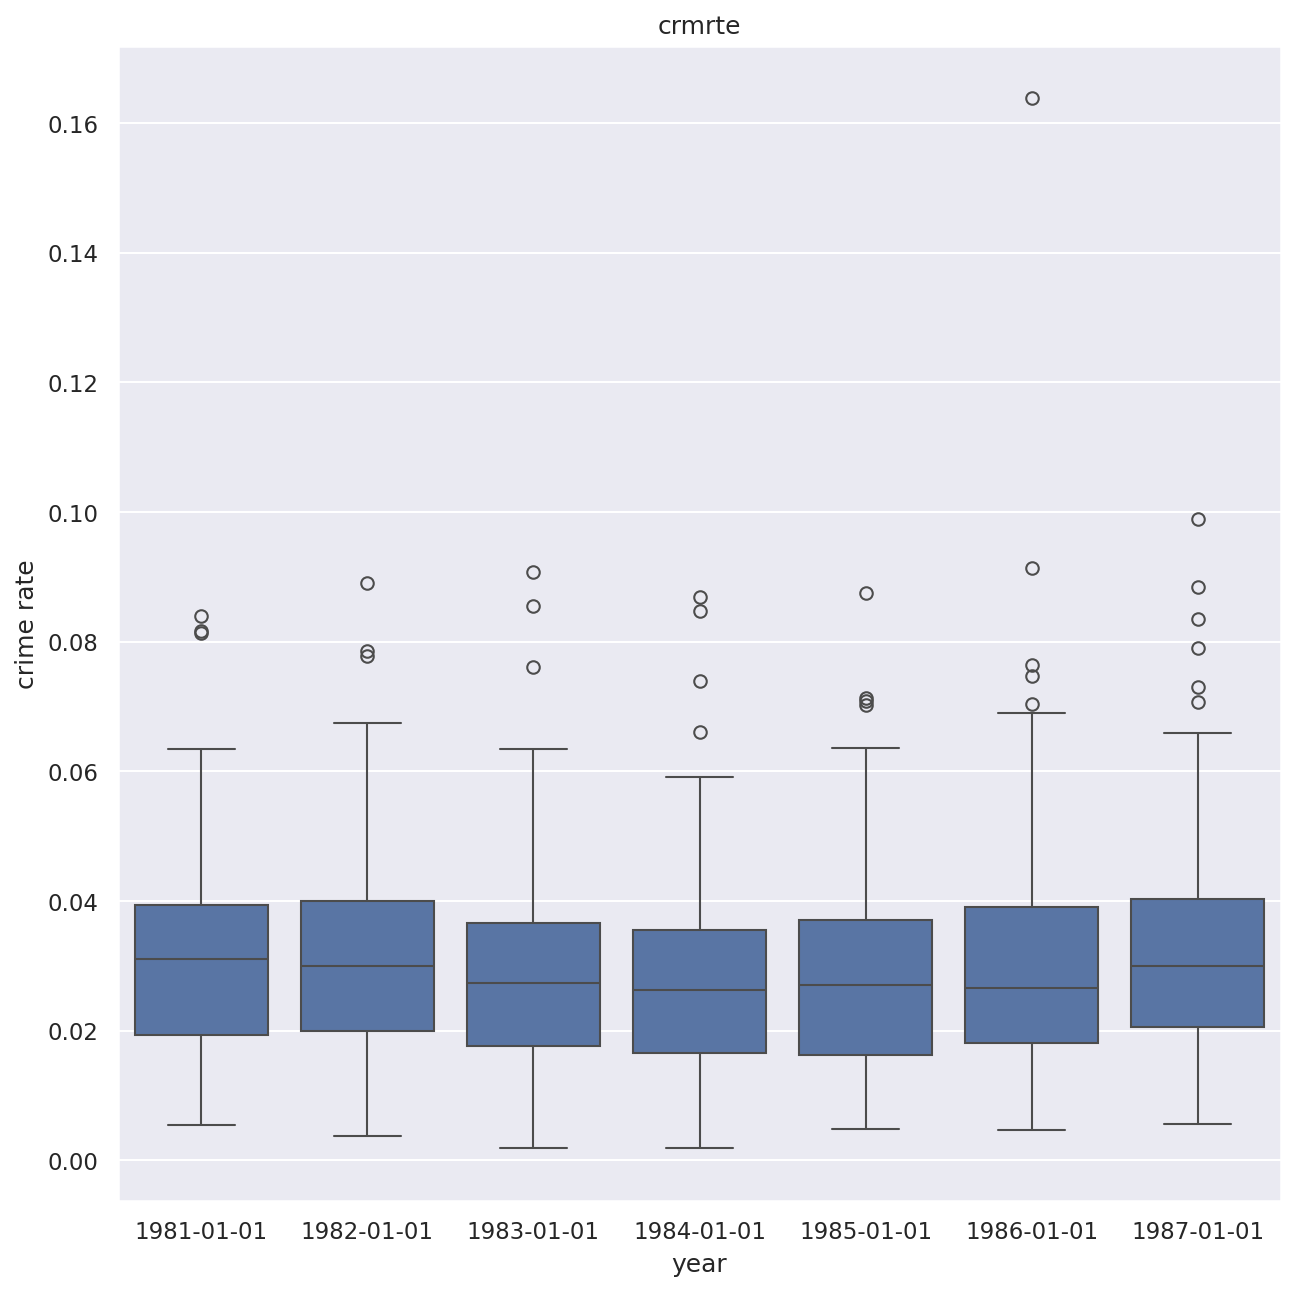

In [84]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)
sns.boxplot(data=df, x='year', y='crmrte', ax=axes)
axes.set_ylabel('crime rate')
axes.set_title('crmrte')